WeatherPY

In [9]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import requests
from scipy.stats import linregress
import json
import time
import os
from datetime import datetime

# import the OpenWeatherMap API key
from api_keys import weather_api_key

# import ciiypy to determine the cities based on latitude and longitude
from citipy import citipy



Generate the Cities List by Using citipy Library

In [13]:
# empty list for holding the latitude and longitude combinations
lat_lngs = []

# empty list for holding the cities
cities = []

# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# create a set of random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# identify the nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # if the city is unique, then add it to the cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count
print(f"The number of cities in the list: {len(cities)}")

The number of cities in the list: 589


Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [21]:
from api_keys import weather_api_key
# set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# set the units for the temperature
units = "metric"

# set the units for the humidity
#humidity_units = "%"

# set the units for the wind speed
#wind_units = "m/s"

# set the units for the cloudiness
#cloud_units = "%"

# create an empty list to hold the weather data for each city
city_data = []

# print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1

# loop through all the cities in the list to fetch weather data
for i, city in enumerate(cities):
        
    # group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # create the endpoint URL
    city_url = f"{base_url}q={city}&appid={weather_api_key}&units={units}"

    # log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # add 1 to the record count
    record_count += 1

    # run an API request for each of the cities
    try:
        # parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # parse out latitude, longitude, maximum temperature, humidity, cloudiness, wind speed, country and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_country = city_weather["sys"]["country"]
        city_wind_speed = city_weather["wind"]["speed"]
        city_clouds = city_weather["clouds"]["all"]
        city_date = city_weather["dt"]

    # append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind_speed,
                          "Country": city_country,
                          "Date": city_date})
    
    # if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# indicate that data loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | mogadishu
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | chonchi
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | kodiak
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | andovoranto
Processing Record 10 of Set 1 | gadzhiyevo
Processing Record 11 of Set 1 | tamanrasset
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | namibe
Processing Record 14 of Set 1 | kingston
Processing Record 15 of Set 1 | tofol
Processing Record 16 of Set 1 | tanjung selor
City not found. Skipping...
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | whitman
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | ushuaia
Processing Recor

In [22]:
# convert the city data into a DataFrame
city_data_df = pd.DataFrame(city_data)

# show the record count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [23]:
# display the sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Olonkinbyen,70.9221,-8.7187,-2.64,62,6,4.46,SJ,1707490169
1,Mogadishu,2.0371,45.3438,28.93,79,0,7.72,SO,1707490169
2,Port-Aux-Francais,-49.3500,70.2167,7.28,92,75,15.72,TF,1707490169
3,Puerto Ayora,-0.7393,-90.3518,27.53,84,72,2.24,EC,1707489943
4,Chonchi,-42.6128,-73.8092,19.62,47,100,2.00,CL,1707489953
5,Edinburgh Of The Seven Seas,-37.0676,-12.3116,19.82,87,98,11.13,SH,1707490169
6,Kodiak,57.7900,-152.4072,3.73,100,100,10.80,US,1707489938
7,Georgetown,5.4112,100.3354,29.97,75,20,1.03,MY,1707489870
8,Andovoranto,-18.9500,49.1000,26.16,90,100,3.16,MG,1707490332
9,Gadzhiyevo,69.2551,33.3362,-18.54,97,100,1.87,RU,1707490170


In [24]:
# export the city data into a CSV
city_data_df.to_csv("WeatherPy_Database.csv", index_label="City_ID")

In [25]:
# read saved data
city_data_df = pd.read_csv("WeatherPy_Database.csv", index_col="City_ID")

# display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Olonkinbyen,70.9221,-8.7187,-2.64,62,6,4.46,SJ,1707490169
1,Mogadishu,2.0371,45.3438,28.93,79,0,7.72,SO,1707490169
2,Port-Aux-Francais,-49.3500,70.2167,7.28,92,75,15.72,TF,1707490169
3,Puerto Ayora,-0.7393,-90.3518,27.53,84,72,2.24,EC,1707489943
4,Chonchi,-42.6128,-73.8092,19.62,47,100,2.00,CL,1707489953
5,Edinburgh Of The Seven Seas,-37.0676,-12.3116,19.82,87,98,11.13,SH,1707490169
6,Kodiak,57.7900,-152.4072,3.73,100,100,10.80,US,1707489938
7,Georgetown,5.4112,100.3354,29.97,75,20,1.03,MY,1707489870
8,Andovoranto,-18.9500,49.1000,26.16,90,100,3.16,MG,1707490332


Create the Scatter Plots Requested

Latitude Vs. Temperature

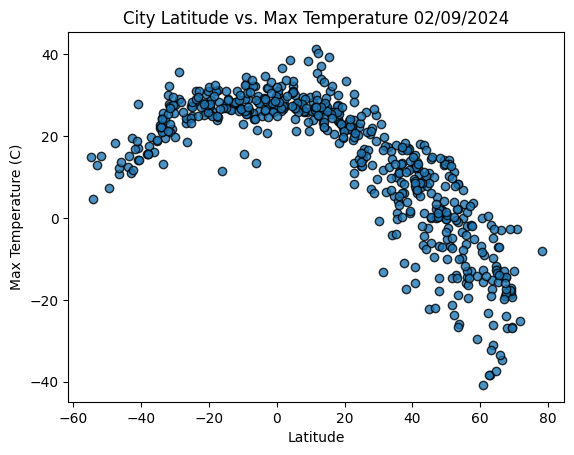

In [27]:
# scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# add title, labels and grid
plt.title(f"City Latitude vs. Max Temperature {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# save the figure
plt.savefig("Fig1.png")

# show the plot
plt.show()

Latitude vs. Humidity

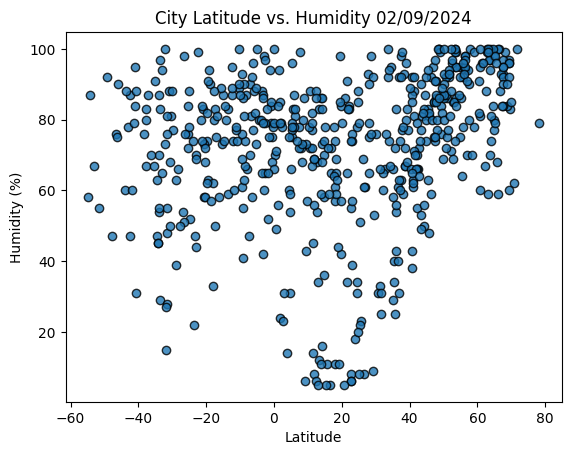

In [29]:
# scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# add title, labels and grid
plt.title(f"City Latitude vs. Humidity {datetime.now().strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# save the figure
plt.savefig("Fig2.png")

# show the plot
plt.show()